## <span> CLASSIFICATION ANALYSIS</span>


### **Question**
Which clients are most likely to abandon the telecommunications firm, and why? What characteristics are particularly significant in terms of reducing customer churn? The classification approach that will be utilized is K-nearest neighbor (KNN).

### **Goal**
Organizational stakeholders will benefit from knowing, with some confidence, which consumers are more likely to churn and which are not. As a result of statistical analysis, stakeholders will be able to acquire answers to their questions and make better business decisions. Understanding the churn rate will also help you sell better services to customers and understand previous user experiences.

### **Justification for KNN Classification Method**

The KNN algorithm believes that objects that are similar are close together. To put it another way, related items are close together.The algorithm keeps a record of all known examples and categorizes new ones using a clear majority from its KNN. The model will select a k number of data points.

### **Assumptions**
A KNN model's main premise is that data points next to one another are relatively similar, whereas data points further away from some other group are different from those data points.

### **Justification of Tools**

1. Jupyter Notebook is incorporated into Visual Studio (IDE), and it also has an in-built debugger. As previously stated, Miniconda is needed to install specialized packages for the offline kernel.
2. "Numpy" is a Python library that allows you to manipulate arrays.
3. Pandas are used to import datasets from different platforms into the Python space (from.csv). Pandas is mainly a library that is used to manipulate and analyze data.
4. "Seaborn" is a tool for visualizing data. It's also easier to work with Pandas data frames.
5. Matplotlib is used to create charts.
6. Scikit-learn provides methods for splitting, fitting, predicting, and applying classification metrics to several machine learning models.

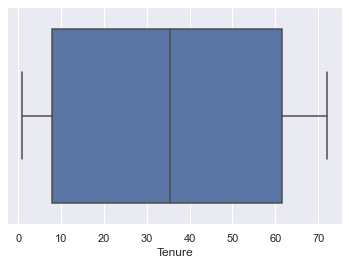

In [165]:
#Checking to see if there are any outliers by using boxplot
sns.boxplot('Tenure', data= churns)
plt.show()

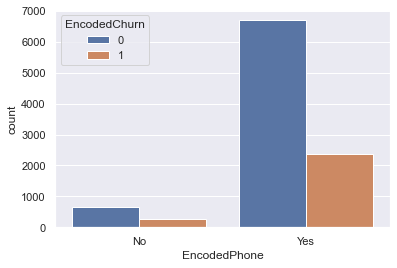

In [166]:
sns.set_theme(style="darkgrid")
plt.figure()
sns.countplot(x='EncodedPhone', hue='EncodedChurn', data=churns)
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

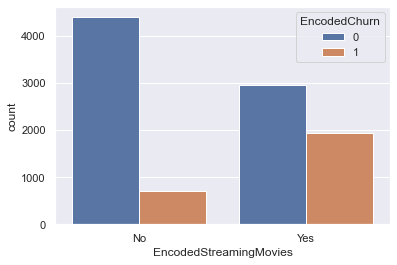

In [167]:
sns.set_theme(style="darkgrid")
plt.figure()
sns.countplot(x='EncodedStreamingMovies', hue='EncodedChurn', data=churns)
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

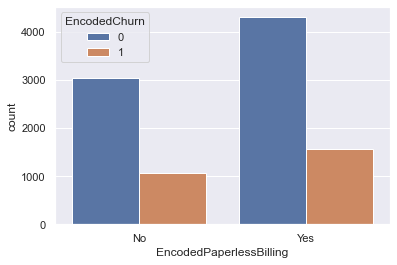

In [168]:
sns.set_theme(style="darkgrid")
plt.figure()
sns.countplot(x='EncodedPaperlessBilling', hue='EncodedChurn', data=churns)
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [ ]:
predictorfeatures = (list(churns.columns[:-1]))
predictorfeatures

In [170]:
predictorfeatures = str(len(predictorfeatures))

In [171]:
print("There will be"+ " "+ predictorfeatures + " predictor variables for analysis")

There will be 33 predictor variables for analysis


In [172]:
churns.to_csv('KNNClassfication.csv')


### **Prepared Dataset**


In [173]:
newchurns = pd.read_csv('KNNClassfication.csv')

In [174]:
newchurns.shape

(10000, 35)

In [175]:
#Predictor Variables will be stored into X. Y will have the values of EncodedChurn. 
x = newchurns.drop('EncodedChurn', axis=1).values
y = newchurns['EncodedChurn'].values
print(x.shape)
print(y.shape)

(10000, 34)
(10000,)


In [176]:
#Import Scikit-learn libraries
import sklearn
from sklearn import datasets
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, classification_report

### **Splitting the data into training and test data sets**


In [177]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.7, test_size = 0.3, random_state = 1)

### **Analysis Technique and Intermediate Calculations**


In [178]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train, y_train)
y_prediction = knn.predict(x_test)
print("Test set predictions are:")
print(y_prediction)

Test set predictions are:
[0 0 0 ... 0 0 0]


In [179]:
#Initial Accuracy Score
knn.score(x_test, y_test)

0.7263333333333334

In [180]:
#Confusion Matrix in Scikit-learn
print(confusion_matrix(y_test, y_prediction))

[[1830  344]
 [ 477  349]]


In [181]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82      2174
           1       0.50      0.42      0.46       826

    accuracy                           0.73      3000
   macro avg       0.65      0.63      0.64      3000
weighted avg       0.71      0.73      0.72      3000



### **Classification Analysis**


In [182]:
#Scaling in Sckikit-learn
from sklearn.preprocessing import scale 
x_scalerz = scale(x)
np.mean(x), np.std(x)


(1427.029760976175, 8331.65056947279)

In [183]:
np.mean(x_scalerz), np.std(x_scalerz)
#Notice the difference between unscaled and scaled features

(-4.148315677893526e-18, 1.0)

In [184]:
#Scaling in a pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

stepperz = [('scaler', StandardScaler()),
 ('knn', KNeighborsClassifier())]
pipelines = Pipeline(stepperz)

# Split dataframe
x_train_scalerz, x_test_scalerz , y_train_scalerz, y_test_scaleds = train_test_split(x, y, test_size = 0.2, random_state = 15)

# Scale dateframe with pipeline object
knn_scaled = pipelines.fit(x_train_scalerz, y_train_scalerz)

# Predict from scaled dataframe
y_pred_scalederz = pipelines.predict(x_test_scalerz)


#Accuracy Score after Scaling!
accuracy_score(y_test_scaleds, y_pred_scalederz)

0.819

In [185]:
print(classification_report(y_test_scaleds, y_pred_scalederz))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1466
           1       0.69      0.58      0.63       534

    accuracy                           0.82      2000
   macro avg       0.77      0.74      0.76      2000
weighted avg       0.81      0.82      0.81      2000



In [186]:
print(confusion_matrix(y_test_scaleds, y_pred_scalederz))

[[1330  136]
 [ 226  308]]


### **Accuracy and Area under the Curve**


Scaling appears to have improved model performance from 0.73 to 0.82 accuracy and 0.79 to 0.85 precision. The area under the curve is .7245

In [ ]:
# Import GridSearchCV for cross validation
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(x_train, y_train)

In [188]:
knn_cv.best_params_

{'n_neighbors': 4}

In [189]:
knn_cv.best_score_

0.7364285714285714

In [190]:
from sklearn.metrics import roc_auc_score
knn_cv.fit(x_train, y_train)

#predicted probability
y_pred_prob = knn_cv.predict_proba(x_test)[:,1]

In [191]:
print("The ROC AUC score:" + str(roc_auc_score(y_test, y_pred_prob)))

The ROC AUC score:0.7245871303162401


In [192]:
#AUC Using cross_validation 
from sklearn.model_selection import cross_val_score 
cross_val_scores = cross_val_score(knn, x_train, y_train, cv = 5, scoring = 'roc_auc')
print(cross_val_scores) #AUC scores computed using 5-fold cross validation

[0.73942955 0.75307127 0.73751969 0.75299054 0.72796496]


### **Limitation of analysis**
You can change the value of k in the KNN algorithm to achieve significantly different results. By experimenting with different variables and analyzing the model's prediction abilities, you can find the value of k. This means that if we choose a different k number of neighbors, the results of our very random choice of k = 7 closest neighbors could be drastically different. As we discovered in our cross-validation grid search, the best parameter for K nearest neighbors is 4. It also appears to be memory and computationally demanding as well.

### **Recommendation**
It's vital for decision-makers to know that the predictor factors that were analyzed produce a poor accuracy score. Thus, we should look at the characteristics that are common among individuals who are leaving the organization and try to reduce the possibility that they will occur with any specific customer in the future. This implies that as a client signs up to more than just the company's services, they are less likely to depart.
Clearly, it is in the best interests of the corporation to offer more products to customers by improving their overall experience with the company by serving clients in understanding all of the services available to them as a subscriber, not just mobile phone service. However, normalizing data on the same scale and cleaning the data at a higher level is strongly suggested to improve KNN, and dimensions must be lowered to increase performance.